In [1]:
from my_lc import my_lc
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

In [2]:
# Generate some MJD values
mjds = np.arange(0, 25, .2)
# Peaks at 10 days
peak_mjd = 10.
shape1 = 0.3
peak_mag = 22
# Set it to be alternating r and z filters
filters = np.zeros(mjds.size, dtype='|U1')
filters[:] = 'r'
filters[::2] = 'z'

In [3]:
lc = my_lc(mjds, peak_mag, peak_mjd, shape1, filters=filters)
lc_r = my_lc(mjds, peak_mag, peak_mjd, shape1)

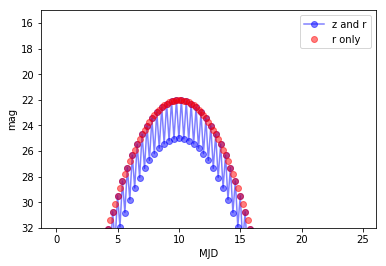

In [4]:
plt.plot(mjds, lc, 'bo-', label='z and r', alpha=.5)
plt.plot(mjds, lc_r, 'ro', label='r only', alpha=.5)
plt.ylim([32, 15])
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()

In [5]:
# Read in a sample of objects
lc_parameters = pd.read_csv('objects.dat', comment='#')

In [6]:
lc_parameters

,ra,dec,peak_mags,shape1
0,0,0,22,0.3
1,0,-10,21,0.6
2,0,-20,20,0.9


Text(0, 0.5, 'mag')

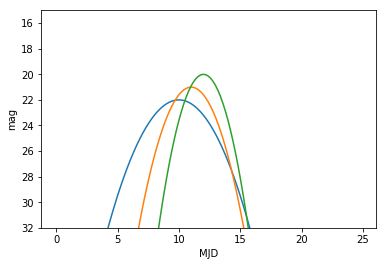

In [7]:
# add in when we want these objects to peak
lc_parameters['peak_mjds'] = np.arange(0,len(lc_parameters), 1) + 10

# generate and plot them all.
for index, lcp in lc_parameters.iterrows():
    lc = my_lc(mjds, lcp['peak_mags'], lcp['peak_mjds'], lcp['shape1'])
    plt.plot(mjds, lc)
plt.ylim([32, 15])
plt.xlabel('MJD')
plt.ylabel('mag')